# EXPLORATORY DATA ANALYSIS
 
 To show an overview of the data we have, we use the following table which has most values which we will use for the recommender system.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import missingno as msno
%matplotlib inline

In [2]:
kernels = pd.read_csv('../Datasets/KernelsCleaned.csv')

In [3]:
kernels.dtypes

Id                             int64
AuthorUserId                   int64
CurrentKernelVersionId       float64
ForkParentKernelVersionId    float64
ForumTopicId                 float64
FirstKernelVersionId         float64
IsProjectLanguageTemplate       bool
CurrentUrlSlug                object
Medal                        float64
TotalViews                     int64
TotalComments                  int64
TotalVotes                     int64
LanguageName                  object
dtype: object

In [4]:
kernels.describe()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,Medal,TotalViews,TotalComments,TotalVotes
count,2.019810e+05,2.019810e+05,1.655960e+05,6.368500e+04,15698.000000,2.008660e+05,7347.000000,201981.000000,201981.000000,201981.000000
mean,4.118388e+05,7.943445e+05,1.828903e+06,1.349575e+06,43767.133138,1.537051e+06,2.661222,297.071487,0.545279,1.817656
std,5.112717e+05,5.408731e+05,1.861784e+06,1.512547e+06,15572.369904,1.760108e+06,0.615812,2848.559756,6.059064,21.696006
min,1.000000e+00,3.680000e+02,1.900000e+01,1.000000e+00,14433.000000,1.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,8.950000e+04,4.155380e+05,4.706428e+05,3.075340e+05,30157.250000,3.315360e+05,2.000000,13.000000,0.000000,0.000000
50%,1.879810e+05,6.888010e+05,1.059955e+06,6.259190e+05,43705.000000,8.829585e+05,3.000000,23.000000,0.000000,0.000000
75%,4.858860e+05,1.001888e+06,2.599765e+06,2.456081e+06,57428.500000,1.889528e+06,3.000000,85.000000,0.000000,0.000000
max,1.994521e+06,2.431709e+06,6.954829e+06,6.953839e+06,70160.000000,6.954829e+06,3.000000,432573.000000,894.000000,2883.000000


In [5]:
kernels.head()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,TotalViews,TotalComments,TotalVotes,LanguageName
0,1,2505,205.0,NaN,NaN,1.0,False,hello,NaN,24,0,0,R
1,2,3716,1748.0,NaN,26670.0,2.0,False,rf-proximity,3.0,7547,1,12,R
2,4,3716,41.0,NaN,NaN,9.0,False,r-version,NaN,9,0,0,R
3,5,28963,19.0,NaN,NaN,13.0,False,test1,NaN,9,0,0,R
4,6,3716,21.0,NaN,NaN,15.0,False,are-icons-missing,NaN,7,0,0,R


In [6]:
kernels.shape

(201981, 13)

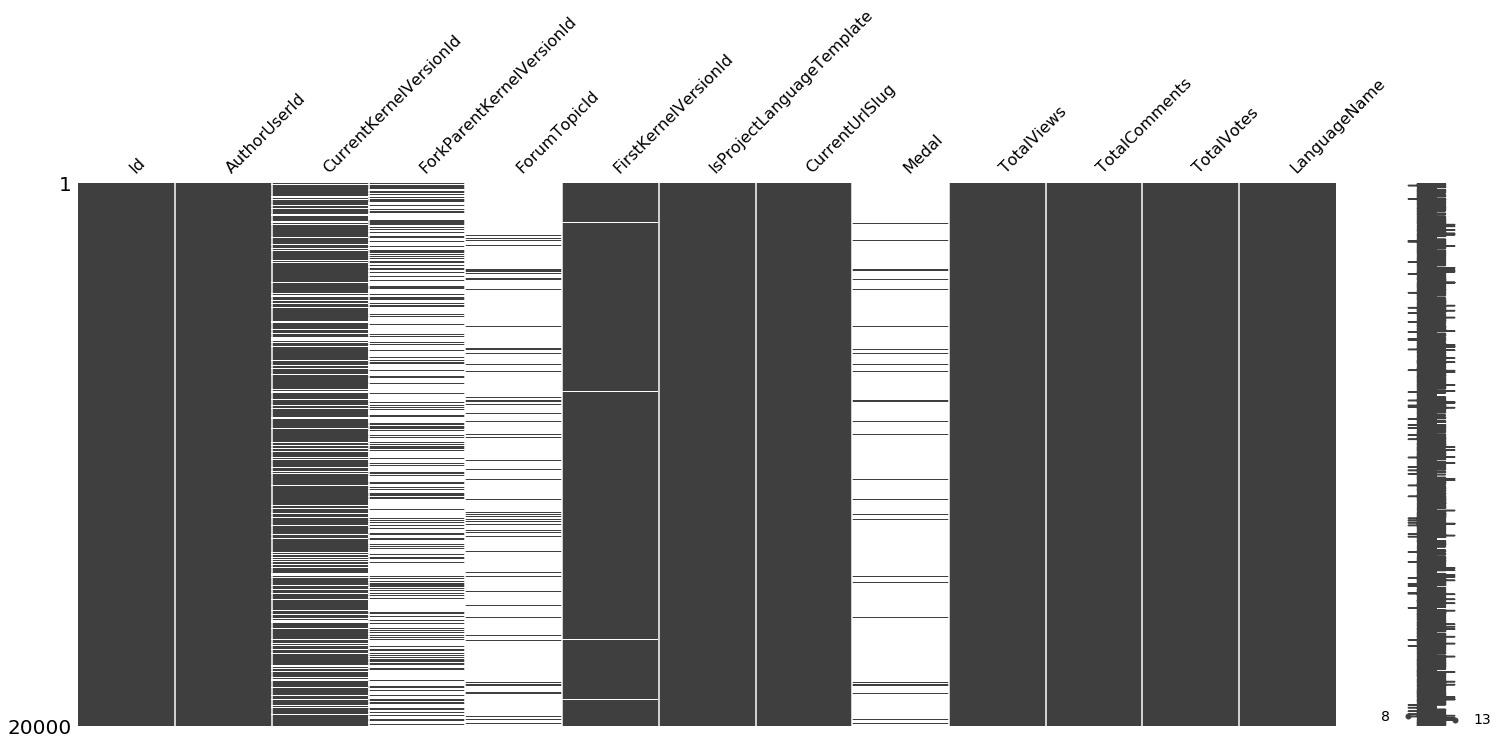

In [14]:
msno.matrix(kernels.sample(20000))

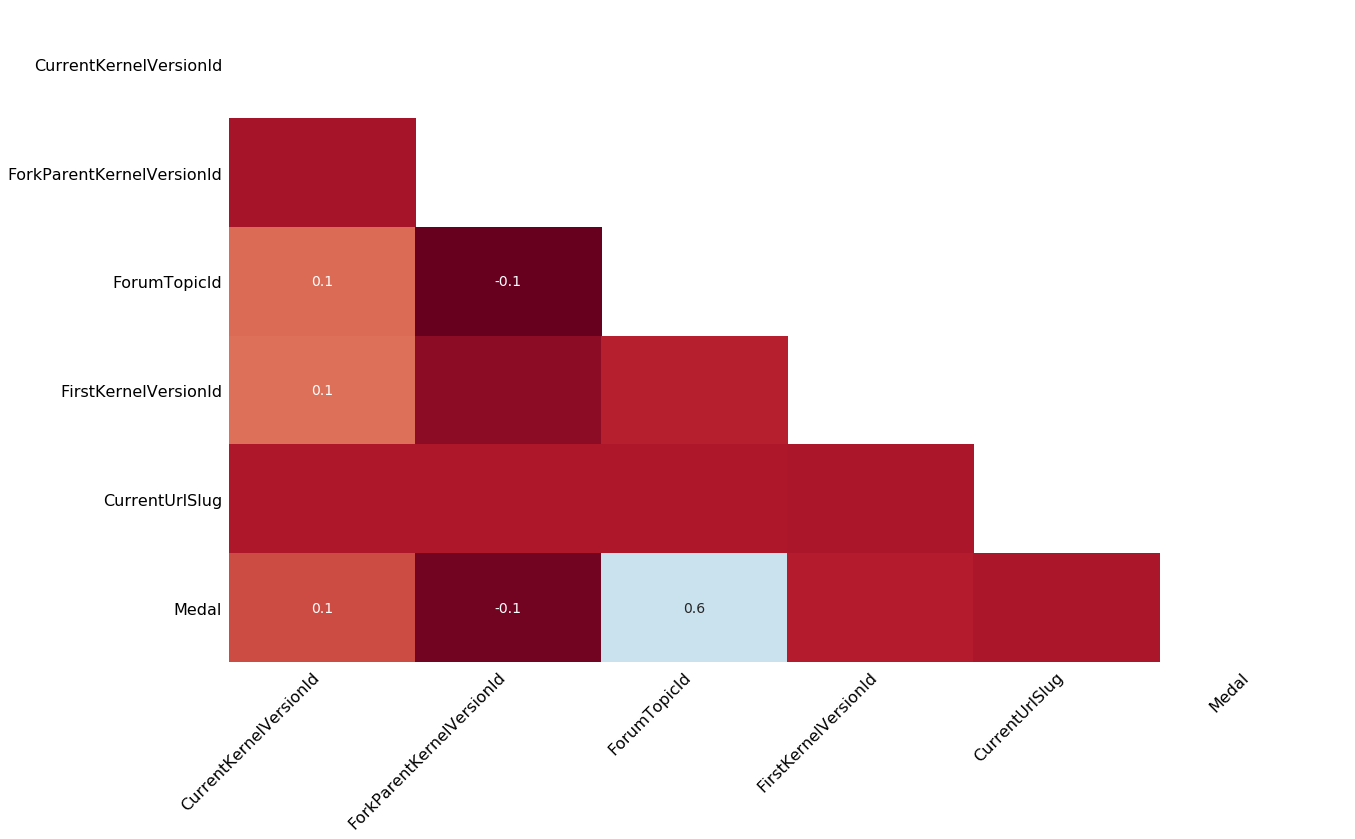

In [12]:
msno.heatmap(kernels)

In [7]:
#Number of kernels wrt Users
user_kernel_no = kernels['AuthorUserId'].value_counts().reset_index()
user_kernel_no.columns = ['AuthorUserId','NumberOfKernels']
KernelCount = user_kernel_no['NumberOfKernels'].value_counts().reset_index()
KernelCount.columns = ['NoOfKernels','NoOfUsers']
KernelCount = KernelCount.sort_values('NoOfKernels')
KernelCount.head()

,NoOfKernels,NoOfUsers
0,1,45999
1,2,14668
2,3,6758
3,4,3710
4,5,2502


In [8]:
#Number of Kernels per Language
language_count = kernels['LanguageName'].value_counts().reset_index()
language_count.columns = ['LanguageName','Count']
language_count

,LanguageName,Count
0,Python,170783
1,R,31198


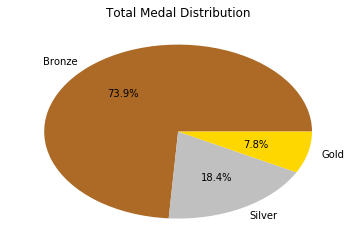

In [9]:
#Medals
medal = kernels[['Id','Medal','LanguageName']].copy()
medalCount = medal['Medal'].value_counts().reset_index()
medalCount.columns = ['Medal','Count']

plt.pie(medalCount['Count'],labels=['Bronze','Silver','Gold'],colors = ['#ad6a27','Silver','Gold'],autopct="%1.1f%%")
plt.title('Total Medal Distribution')
plt.show()

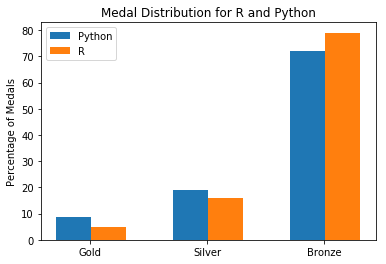

In [10]:
#Language Wise Medal Distribution
pymed = medal.loc[medal['LanguageName'] == 'Python']
rmed = medal.loc[medal['LanguageName'] == 'R']
pymed = pymed['Medal'].value_counts().reset_index()
pymed.columns = ['Medal','Count']
pymed['Percent'] = pymed['Count']/sum(pymed['Count'])*100
rmed = rmed['Medal'].value_counts().reset_index()
rmed.columns = ['Medal','Count']
rmed['Percent'] = rmed['Count']/sum(rmed['Count'])*100
plt.title('Medal Distribution for R and Python')
plt.bar(pymed['Medal'],pymed['Percent'],tick_label=['Bronze','Silver','Gold'],width = 0.3,align='center')
plt.bar(rmed['Medal']+0.3,rmed['Percent'],tick_label=['Bronze','Silver','Gold'],width = 0.3,align='center')
plt.ylabel('Percentage of Medals')
plt.xticks(medalCount['Medal']+0.14)
plt.legend(('Python','R'))
plt.show()